## Weighted Ridge Regression Optimization

We generate two highly correlated features X1 and X2 from a multli-variate normal distribution, we would like to implement the Ridge regression.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import PolynomialFeatures
# Please try to use only these packages for computation

n = 1000
p = 2

mean = np.zeros((p))

val = 0.99
cov = np.ones((p,p))*val
cov = cov + np.eye(p)*(1-val)


np.random.seed(10)
X = np.random.multivariate_normal(mean, cov, n)
theta_true = np.ones((p,1))
print(X.shape)
print(theta_true.shape)

(1000, 2)
(2, 1)


We first generate data based on $y=X\theta+e$, where $e$ follows $N(0,\Sigma)$, with $\delta=0.5$

In [8]:
delta=0.5
Sigma = np.eye(n,n,k=-1)*0.4 + np.eye(n,n)*1 + np.eye(n,n,k=1)*0.4
mean = np.zeros(n)
e = np.random.multivariate_normal(mean, Sigma, 1)
y=np.dot(X,theta_true) + delta*e.T
P=PolynomialFeatures(1)
X = P.fit_transform(X)
X

array([[ 1.        , -1.37883123, -1.2776755 ],
       [ 1.        ,  1.54212478,  1.54093912],
       [ 1.        , -0.56886295, -0.67069843],
       ...,
       [ 1.        , -0.56168953, -0.47213548],
       [ 1.        , -1.17606098, -1.12341923],
       [ 1.        , -0.73164837, -0.48977895]])

### Part 1: Analytical solution
(1) 1. Please derive the log likelihood function $l(\theta)$ of the weighted linear regression and implement in Python. 

In [9]:
p=3
lambda1 = 20
theta_ridge_est = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + lambda1*np.eye(p)), X.T), y)
print(theta_ridge_est)

[[-0.02597943]
 [ 1.01081793]
 [ 0.975214  ]]


### Part 2: Gradient Descent

(a) Please derive the gradient descent algorithm for the ridge regression problem for each iteration and write down for each iteration the way to update the coefficient $\theta$. 

In [10]:
def computeCost(X, y,lambda1,theta):

    return (1/n)*np.dot((y-np.dot(X,theta)).T, (y-np.dot(X,theta))) + (1/n)*lambda1*np.dot(theta.T, theta)
    
def computeGrad(X, y,lambda1, theta):
    return -2*np.dot(X.T, (y-np.dot(X,theta))) + 2*lambda1*theta

(b) Let's use Gradient Descent to update parameter until convergence, please try different stepsize to see the Convergence performance. 

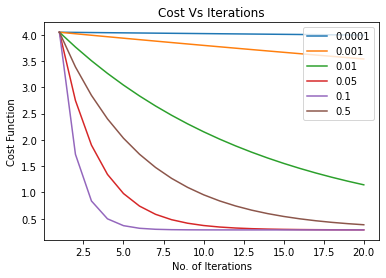

In [11]:
step_size = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5]
num_Iter = 20
J=0
grad = np.array([[0],[0],[0]])
iterations = np.linspace(1,20,20)
def gradientDescent(X, y, lambda1, step_size, num_Iter):
    theta = np.array([[0],[0],[0]])
    for i  in range(1, num_Iter+1):
        J=computeCost(X, y, lambda1, theta)
        grad = computeGrad(X, y, lambda1, theta)
        theta = theta-step_size*(1/n)*grad
        J_history.append(J[0][0])
for i in step_size:
    J_history = []
    gradientDescent(X, y, lambda1, i, num_Iter)
    plt.plot(iterations, J_history, label = i)
    plt.xlabel("No. of Iterations")
    plt.ylabel("Cost Function")
    plt.title("Cost Vs Iterations")
    plt.legend(loc="upper right")

(c) Normally, it is good to visualize the loss function over time, please plot the loss (cost) function for theta in each iteration. 

Text(0.5, 1.0, 'Cost value over iterations')

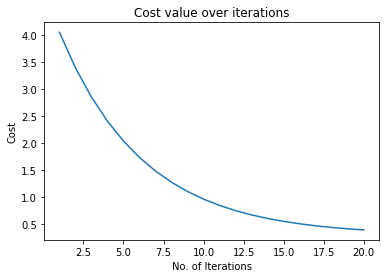

In [12]:
iterations=np.linspace(1,20,20)
plt.plot(iterations, J_history)
plt.xlabel("No. of Iterations")
plt.ylabel("Cost")
plt.title("Cost value over iterations")
